# A full working example: an AGIR study of coked zeolites

This example concerns the **study of coked hierarchical zeolites**.

In [1]:
from spectrochempy.api import *
options.log_level=WARNING


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


## Introduction

todo : complete this 

Below we use the matplotlib library to draw the figure of the AGIR setup.

<IPython.core.display.Javascript object>


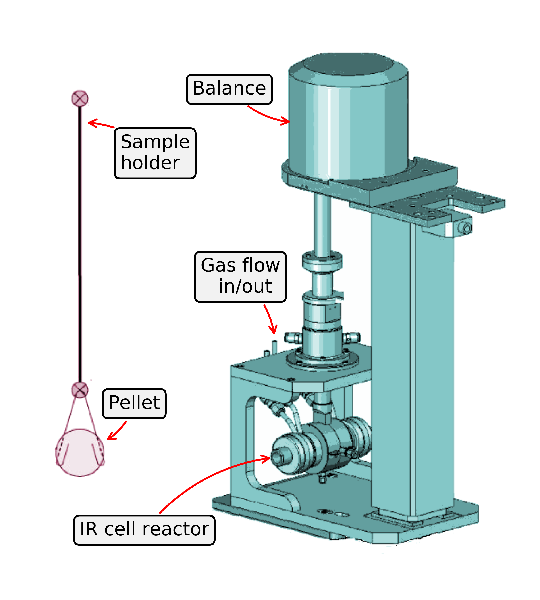

In [2]:
agir = plt.imread('annotated_fig_agir_setup.png')
agir = agir[250:2650]
w,h,_ = agir.shape
r = w/h
fig = plt.figure(figsize=(3.6,3.6*r), dpi=150, frameon=False)
ax = fig.add_subplot(111, aspect='equal')
ax.imshow(agir)
ax.set_yticks([])
ax.set_xticks([])
_ = ax.axis('off')

## Reading the data

The data, we will be processing come from the AGIR setup at the Laboratory LCS.

We have TGA (Thermogravimetric analysis) and IR (Infrared) data recorded simultaneously, for 3 samples recorded at 350°C :
P (parent), A (acid treatment), B (basic treatment)

The IR data have been exported as `csv` file (on file per spectra) and then zipped. Therefore, we will use the function `read_zip` to open the IR data. 

For the TGA data are in `csv` files, so we use `read_csv` to read them.

To keep the data easily accessible, we create a dictionary `samples`

In [3]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

### Reading the raw  IR data

Note that reading a large set of `.csv` file is rather slow. Be patient! 

After reading each dataset, we save the data in the `scp` format of SpectroChemPy, so that further reading of the data will be much faster.

In [4]:
for key, sample in samples.items():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    if os.path.exists(basename+'.scp'):
        #check if the scp file have already been saved
        filename = basename + '.scp'
        sample['IR'] = NDDataset.read( filename)
    else:
        # else read the original zip file
        filename = basename + '.zip'
        sample['IR'] = NDDataset.read_zip( filename, origin='omnic_export')
        s = sample['IR']
        s.y -= s.y[0]  # remove offset to axe y 
        s.y.ito('hour')  # adapt units
        s.y.title = 'TOS' # put some explicit title (to replace timestamps)
        # save
        sample['IR'].save(basename + '.scp')

#### Plot of the raw IR data 

<IPython.core.display.Javascript object>


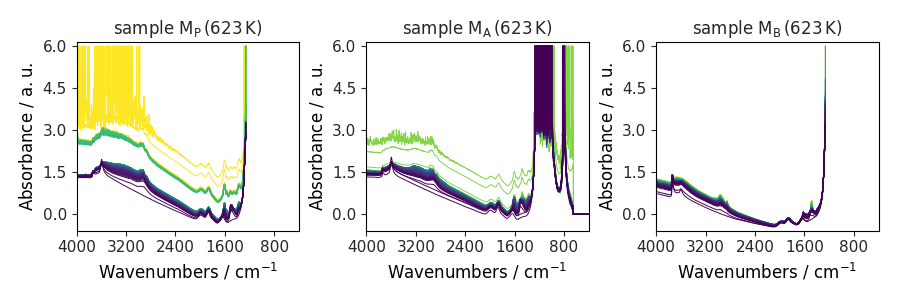

{'axe11': <matplotlib.axes._subplots.AxesSubplot at 0x11df0def0>,
 'axe12': <matplotlib.axes._subplots.AxesSubplot at 0x11df0d6d8>,
 'axe13': <matplotlib.axes._subplots.AxesSubplot at 0x10b85a6d8>}

In [5]:
sources = [sample['IR'] for sample in samples.values()]
labels = ["sample "+sample['label'] for sample in samples.values()]

multiplot_stack(sources=sources, labels=labels, nrow=1, ncol=3, figsize=(9,3), sharex=False,
                sharey=False, style='sans')

The multiplot command retrun a list of all subplots contained in the figure. It is displayed automatically in notebooks when the command is issued on the last line of an input cell. To avoid such display, capture the output like this:

<IPython.core.display.Javascript object>


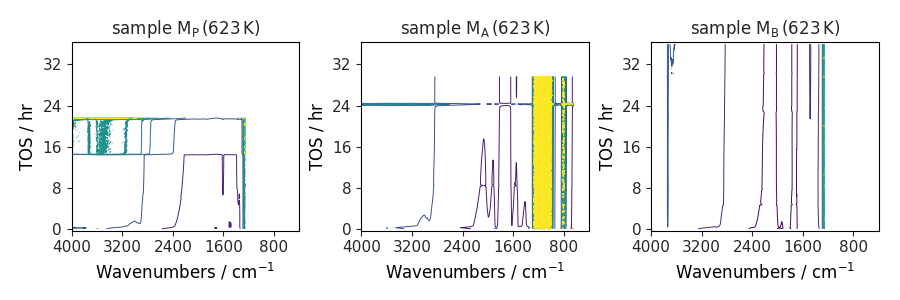

In [6]:
_ = multiplot_map(sources=sources, labels=labels, nrow=1, ncol=3, figsize=(9,3), sharex=False,
                sharey=False, style='sans')

### Reading the raw TGA data

Now read the TGA data

In [7]:
for key, sample in samples.items():
    basename = os.path.join(scpdata,'agirdata/{}/TGA/tg'.format(key))
    if os.path.exists(basename+'.scp'):
        # check if the scp file have already been saved
        filename = basename + '.scp'
        sample['TGA'] = NDDataset.read( filename)
    else:
        # else read the original csv file
        filename = basename + '.csv'
        ss = sample['TGA'] = NDDataset.read_csv(filename)
        # lets keep only data from something close to 0.
        s = sample['TGA'] = ss[-0.5:35.0]
        # for TGA, some information are missing. 
        # we add them here
        s.x.units = 'hour'
        s.units = 'weight_percent' 
        s.x.title = 'Time-on-stream'
        s.title = 'Mass change'
        # save
        sample['TGA'].save(basename + '.scp')

#### Plot of the raw TGA data

<IPython.core.display.Javascript object>


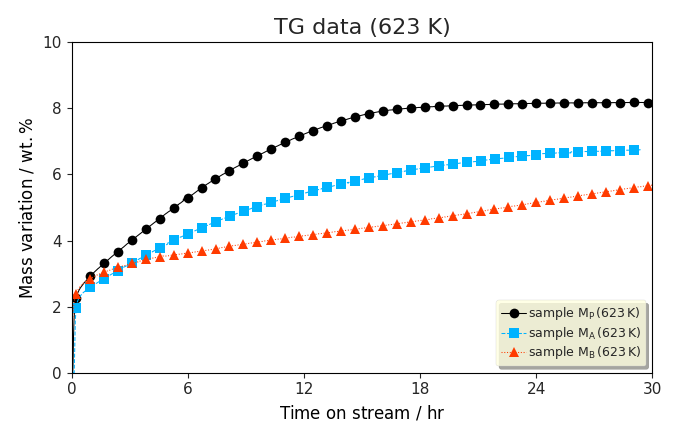

In [8]:
sources = [sample['TGA'] for sample in samples.values()]
labels = ["sample "+sample['label'] for sample in samples.values()]

ax = plot_multiple(sources=sources, labels=labels, lines=True, style='sans', markevery=50, markersize=7,
                  ylim=(0,10.), xlim=(0,30.), legend='lower right')

title = 'TG data (623 K)'
ax.set_title(title, fontsize=16)